#                                        Case Study on ANOVA

XYZ Company has offices in four different zones. The company wishes to investigate the following : ● The mean sales generated by each zone. ● Total sales generated by all the zones for each month. ● Check whether all the zones generate the same amount of sales. Help the company to carry out their study with the help of data provided.

In [21]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

In [22]:
#read the dataset
df=pd.read_csv('Sales_data_zone_wise.csv')
df.head()

,Month,Zone - A,Zone - B,Zone - C,Zone - D
0,Month - 1,1483525,1748451,1523308,2267260
1,Month - 2,1238428,1707421,2212113,1994341
2,Month - 3,1860771,2091194,1282374,1241600
3,Month - 4,1871571,1759617,2290580,2252681
4,Month - 5,1244922,1606010,1818334,1326062


In [23]:
df.shape

(29, 5)

There are 29 samples and 5 features

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Month     29 non-null     object
 1   Zone - A  29 non-null     int64 
 2   Zone - B  29 non-null     int64 
 3   Zone - C  29 non-null     int64 
 4   Zone - D  29 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.3+ KB


The dataset contains 29 entries with columns Month, Zone A, Zone B, Zone C, Zone D. The data shows the zonewise monthwise sales.

In [25]:
df.describe()

,Zone - A,Zone - B,Zone - C,Zone - D
count,2.900000e+01,2.900000e+01,2.900000e+01,2.900000e+01
mean,1.540493e+06,1.755560e+06,1.772871e+06,1.842927e+06
std,2.619401e+05,1.683899e+05,3.331937e+05,3.750165e+05
min,1.128185e+06,1.527574e+06,1.237722e+06,1.234311e+06
25%,1.305972e+06,1.606010e+06,1.523308e+06,1.520406e+06
50%,1.534390e+06,1.740365e+06,1.767047e+06,1.854412e+06
75%,1.820196e+06,1.875658e+06,2.098463e+06,2.180416e+06
max,2.004480e+06,2.091194e+06,2.290580e+06,2.364132e+06


In [26]:
df.describe(include='all')

,Month,Zone - A,Zone - B,Zone - C,Zone - D
count,29,2.900000e+01,2.900000e+01,2.900000e+01,2.900000e+01
unique,29,NaN,NaN,NaN,NaN
top,Month - 1,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
mean,NaN,1.540493e+06,1.755560e+06,1.772871e+06,1.842927e+06
std,NaN,2.619401e+05,1.683899e+05,3.331937e+05,3.750165e+05
min,NaN,1.128185e+06,1.527574e+06,1.237722e+06,1.234311e+06
25%,NaN,1.305972e+06,1.606010e+06,1.523308e+06,1.520406e+06
50%,NaN,1.534390e+06,1.740365e+06,1.767047e+06,1.854412e+06
75%,NaN,1.820196e+06,1.875658e+06,2.098463e+06,2.180416e+06


There are 29 respondents in the datatset.
It has 29 unique months

In [27]:
df.dtypes

Month       object
Zone - A     int64
Zone - B     int64
Zone - C     int64
Zone - D     int64
dtype: object

In [28]:
df.isna().sum()

Month       0
Zone - A    0
Zone - B    0
Zone - C    0
Zone - D    0
dtype: int64

There is no null values

In [29]:
df.columns

Index(['Month', 'Zone - A', 'Zone - B', 'Zone - C', 'Zone - D'], dtype='object')

displays all features in the dataset

In [30]:
df.pivot_table(values=['Zone - A', 'Zone - B', 'Zone - C', 'Zone - D'],index='Month')

,Zone - A,Zone - B,Zone - C,Zone - D
Month,,,,
Month - 1,1483525,1748451,1523308,2267260
Month - 10,1852450,1913059,1754314,1608387
Month - 11,2004480,1740365,1317869,1970069
Month - 12,1537539,1875658,1237722,1460165
Month - 13,1254939,1588473,1348629,1733383
Month - 14,1821799,1844081,1617376,1872259
Month - 15,1128185,1804613,1767047,1234311
Month - 16,1491534,1542053,1882159,1590913
Month - 17,1182110,1552388,2234469,2180416


<AxesSubplot:>

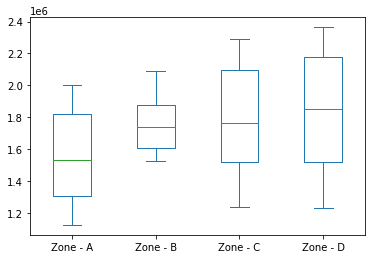

In [31]:
df.pivot_table(values=['Zone - A', 'Zone - B', 'Zone - C', 'Zone - D'],index='Month').plot(kind='box')

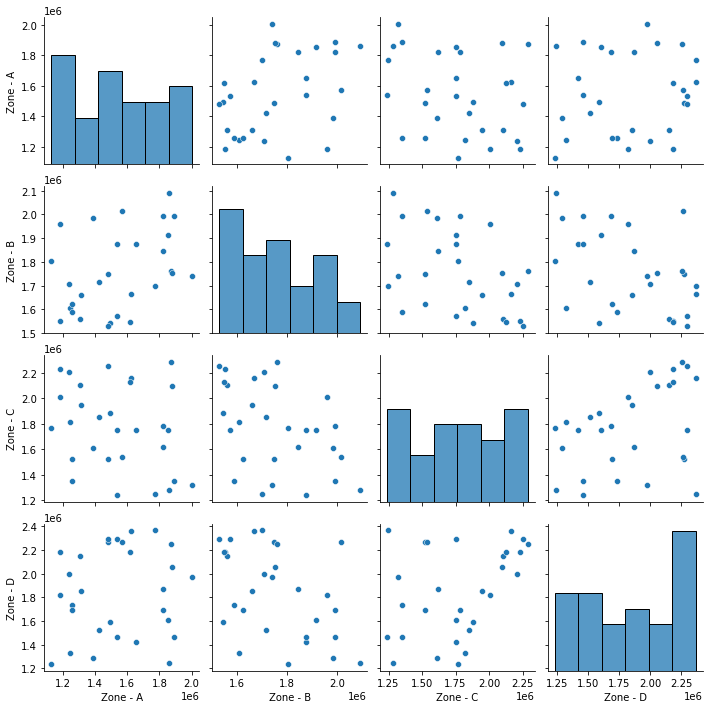

In [32]:
sns.pairplot(df)

# ● The mean sales generated by each zone

In [33]:
print('The mean sales generated by zone A is', df['Zone - A'].mean())
print('The mean sales generated by zone B is', df['Zone - B'].mean())
print('The mean sales generated by zone C is', df['Zone - C'].mean())
print('The mean sales generated by zone D is', df['Zone - D'].mean())

The mean sales generated by zone A is 1540493.1379310344
The mean sales generated by zone B is 1755559.5862068965
The mean sales generated by zone C is 1772871.0344827587
The mean sales generated by zone D is 1842926.7586206896


# ● Total sales generated by all the zones for each month.


In [37]:
df.sum(axis = 1, skipna = True)

0     7022544
1     7152303
2     6475939
3     8174449
4     5995328
5     7151387
6     7287108
7     7816299
8     6703395
9     7128210
10    7032783
11    6111084
12    5925424
13    7155515
14    5934156
15    6506659
16    7149383
17    7083490
18    6971953
19    7124599
20    7389597
21    7560001
22    6687919
23    7784747
24    6095918
25    6512360
26    6267918
27    7470920
28    6772277
dtype: int64

The sum total of sales, zonewise, for all 28 months are displayed above.

In [38]:
df.sum(axis = 0)

Month       Month - 1Month - 2Month - 3Month - 4Month - 5M...
Zone - A                                             44674301
Zone - B                                             50911228
Zone - C                                             51413260
Zone - D                                             53444876
dtype: object

The sum total of sales for 4 zones, i.e, zone A, zone B, zone C and zone D are displayed above.

Check whether all the zones generate the same amount of sales.


Hypothesis
Ho:Sales(zone A) = Sales(zone B) = Sales(zone C) = Sales(zone D) i.e.,There is no significant difference among the sales.

Ha:Sales(zone A) != Sales(zone B) != Sales(zone C) != Sales(zone D) i.e.,There is significant difference among the sales

alpha: 0.05 , level of significance = 5%

One way Anova

In [40]:
import scipy.stats as stats

In [42]:
fvalue, pvalue = stats.f_oneway(df['Zone - A'], df['Zone - B'], df['Zone - C'], df['Zone - D'])
print('f value= ',fvalue,'and p value =',pvalue)

f value=  5.672056106843581 and p value = 0.0011827601694503335


P value less than 0.05. Thus we reject the null hypothesis. There is significant difference among the sales in 4 given zones.
 